--- 5 Data Pertama ---
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


--- Data Setelah Diubah ke Angka ---
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False        

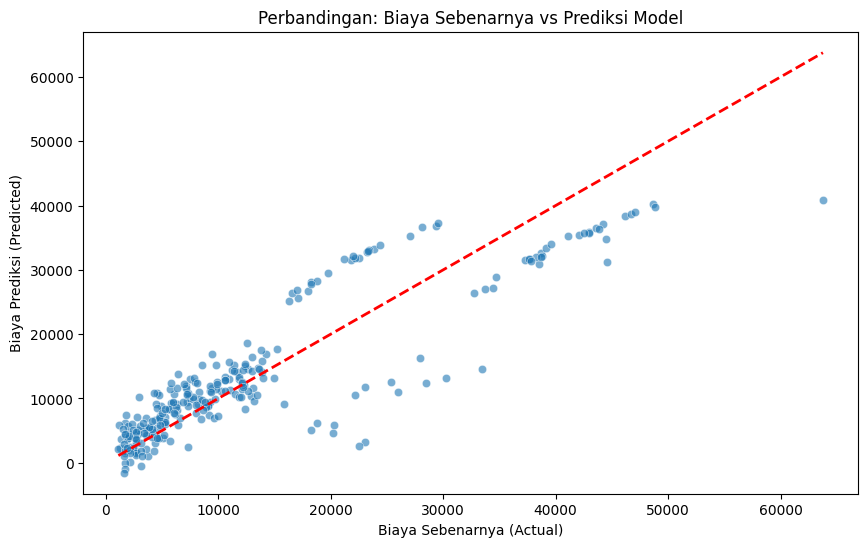

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv('insurance.csv')

print("--- 5 Data Pertama ---")
print(df.head())
print("\n")


df_clean = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

print("--- Data Setelah Diubah ke Angka ---")
print(df_clean.head())
print("\n")


X = df_clean.drop('charges', axis=1)


y = df_clean['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)



y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("--- Performa Model ---")
print(f"Akurasi (R-Squared) : {r2:.2f} (Model menjelaskan {r2*100:.1f}% variasi data)")
print(f"Rata-rata Kesalahan (MAE) : {mae:.2f}")
print(f"Root Mean Squared Error   : {rmse:.2f}")
print("\n")


coef_data = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("--- Faktor Penentu Biaya (Koefisien) ---")
print(coef_data.sort_values(by='Coefficient', ascending=False))


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) 
plt.xlabel('Biaya Sebenarnya (Actual)')
plt.ylabel('Biaya Prediksi (Predicted)')
plt.title('Perbandingan: Biaya Sebenarnya vs Prediksi Model')
plt.show()